In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan

In [2]:
#!pip install openpyxl
try:
  df = pd.read_excel('Dataviz.xlsx', engine='openpyxl')
  print(df.head())
except FileNotFoundError:
  print("Error: File not found. Please check the file path.")
except Exception as e:
  print(f"An error occurred: {e}")

   Respondent ID  Collector ID          Start Date            End Date  \
0   118452495710     452782804 2023-10-25 16:14:52 2023-10-25 17:14:29   
1   118452534935     452782804 2023-10-25 17:01:26 2023-10-25 17:14:28   
2   118452538255     452782804 2023-10-25 17:04:47 2023-10-25 17:12:52   
3   118452530063     452782804 2023-10-25 16:50:38 2023-10-25 17:08:55   
4   118452535989     452782804 2023-10-25 15:15:46 2023-10-25 17:07:24   

    IP Address Ունե՞ք բանկային քարտ Ունե՞ք բանկային հաշիվ  \
0  5.39.206.18                   Ոչ                    Ոչ   
1  5.39.206.18                  Այո                   Այո   
2  5.39.206.18                  Այո                   Այո   
3  5.39.206.18                   Ոչ                    Ոչ   
4  5.39.206.18                   Ոչ                    Ոչ   

  Օգտվում ե՞ք անկանխիկ վճարամիջոցներից   \
0                                    Ոչ   
1                                   Այո   
2                                    Ոչ   
3               

In [3]:
df.head()

,Respondent ID,Collector ID,Start Date,End Date,IP Address,Ունե՞ք բանկային քարտ,Ունե՞ք բանկային հաշիվ,Օգտվում ե՞ք անկանխիկ վճարամիջոցներից,"Խնդրում ենք նշել, թե ո՞ր անկանխիկ վճարամիջոցներից եք օգտվում(Բանկի հավելված)","Խնդրում ենք նշել, թե ո՞ր անկանխիկ վճարամիջոցներից եք օգտվում(Բանկային քարտ)",...,Քաղաք,Գյուղ,Ամսաթիվ,Դուք այս պահին աշխատու՞մ եք,"Եթե աշխատում եք, ապա կնշե՞ք ոլորտը",Աշխատում եք որպես,Պատասխանողի կրթությունը,Պատասխանողի տարիքը,Ձեր միջին ամսական եկամտի միջնակայքը,Պատասխանողի սեռը
0,118452495710,452782804,2023-10-25 16:14:52,2023-10-25 17:14:29,5.39.206.18,Ոչ,Ոչ,Ոչ,NaN,NaN,...,NaN,NaN,10/25/2023,NaN,NaN,NaN,NaN,45-54,NaN,Իգական
1,118452534935,452782804,2023-10-25 17:01:26,2023-10-25 17:14:28,5.39.206.18,Այո,Այո,Այո,1. Բանկի հավելված,2. Բանկային քարտ,...,NaN,NaN,10/25/2023,NaN,NaN,NaN,Բարձրագույն,NaN,NaN,Արական
2,118452538255,452782804,2023-10-25 17:04:47,2023-10-25 17:12:52,5.39.206.18,Այո,Այո,Ոչ,NaN,NaN,...,Չարենցավան,-,10/25/2023,Այո,Պետական,Գործատու,Միջնակարգ,25-34,NaN,Արական
3,118452530063,452782804,2023-10-25 16:50:38,2023-10-25 17:08:55,5.39.206.18,Ոչ,Ոչ,Ոչ,NaN,NaN,...,-,NaN,10/25/2023,Այո,Մասնավոր,Ինքնազբաղված,Միջնակարգ,35-44,101 001 - 200 000 դրամ,Արական
4,118452535989,452782804,2023-10-25 15:15:46,2023-10-25 17:07:24,5.39.206.18,Ոչ,Ոչ,Ոչ,NaN,NaN,...,NaN,NaN,10/25/2023,Ոչ,NaN,NaN,Միջնակարգ,35-44,NaN,Իգական


In [4]:
print(df.columns)

Index(['Respondent ID', 'Collector ID', 'Start Date', 'End Date', 'IP Address',
       'Ունե՞ք բանկային քարտ', 'Ունե՞ք բանկային հաշիվ',
       'Օգտվում ե՞ք անկանխիկ վճարամիջոցներից ',
       'Խնդրում ենք նշել, թե ո՞ր անկանխիկ վճարամիջոցներից եք օգտվում(Բանկի հավելված)',
       'Խնդրում ենք նշել, թե ո՞ր անկանխիկ վճարամիջոցներից եք օգտվում(Բանկային քարտ)',
       'Խնդրում ենք նշել, թե ո՞ր անկանխիկ վճարամիջոցներից եք օգտվում(Իդրամ, թելսել, Իզիփեյ, Թիմփեյ այլ Էլեկ. Դրամապանակներ)',
       'Խնդրում ենք նշել, թե ո՞ր անկանխիկ վճարամիջոցներից եք օգտվում(ԱրՔա հավելված)',
       ' Խնդրում ենք նշել, թե ո՞ր անկանխիկ վճարամիջոցներից եք օգտվում(Apple pay, Google pay)',
       'Խնդրում եմ թվարկեք այն անկանխիկ գործարքները, որոնք իրականացնում եք առցանց՝ բանկինգի բջջային հավելվածով(Ներհայաստանյան փոխանցումներ)',
       'Խնդրում եմ թվարկեք այն անկանխիկ գործարքները, որոնք իրականացնում եք առցանց՝ բանկինգի բջջային հավելվածով(Միջպետական փոխանցումներ)',
       'Խնդրում եմ թվարկեք այն անկանխիկ գործարքները, որո

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 70 columns):
 #   Column                                                                                                                                                 Non-Null Count  Dtype         
---  ------                                                                                                                                                 --------------  -----         
 0   Respondent ID                                                                                                                                          801 non-null    int64         
 1   Collector ID                                                                                                                                           801 non-null    int64         
 2   Start Date                                                                                                                                    

In [6]:
data= df.iloc[1:]

#Անկանխիկ վճարամիջոցներ

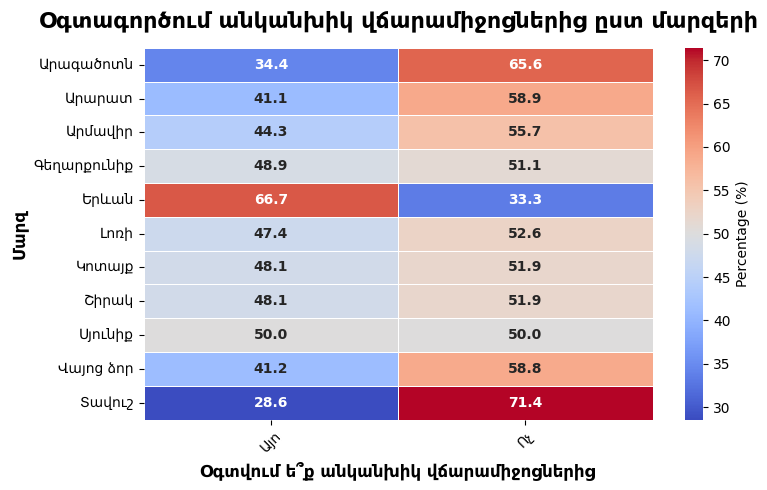

In [7]:
grouped = data.groupby(['Մարզ', 'Օգտվում ե՞ք անկանխիկ վճարամիջոցներից ']).size().unstack(fill_value=0)
grouped_percentage = grouped.div(grouped.sum(axis=1), axis=0) * 100

plt.figure(figsize=(8, 5))
sns.heatmap(
    grouped_percentage,
    annot=True,
    fmt=".1f",
    cmap="coolwarm",
    linewidths=0.5,
    linecolor='white',
    cbar_kws={'label': 'Percentage (%)'},
    annot_kws={'fontsize': 10, 'weight': 'bold'}
)

plt.title('Օգտագործում անկանխիկ վճարամիջոցներից ըստ մարզերի', fontsize=16, weight='bold', pad=15)
plt.ylabel('Մարզ', fontsize=12, weight='bold')
plt.xlabel('Օգտվում ե՞ք անկանխիկ վճարամիջոցներից', fontsize=12, weight='bold')

plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

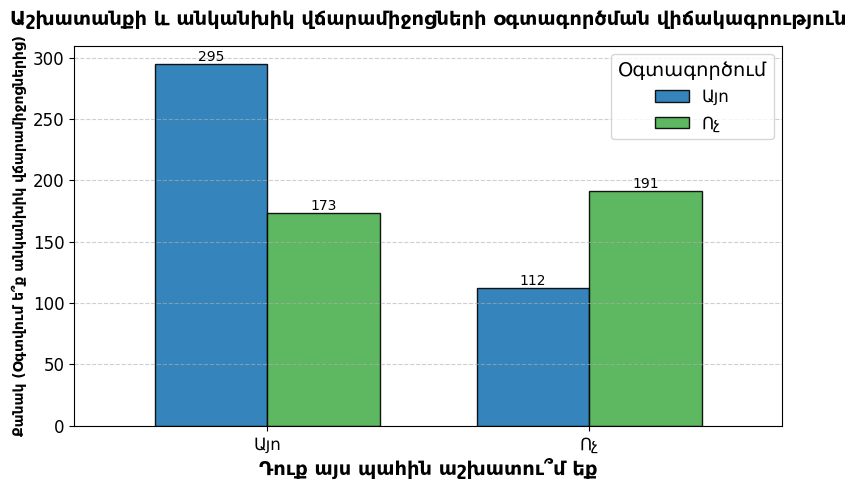

In [8]:
grouped = data.groupby(['Դուք այս պահին աշխատու՞մ եք', 'Օգտվում ե՞ք անկանխիկ վճարամիջոցներից ']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 8))


grouped.plot(
    kind='bar',
    figsize=(8, 5),
    width=0.7,
    color = ['tab:blue', '#4CAF50'],
    edgecolor='black',
    alpha=0.9
)

for i, container in enumerate(plt.gca().containers):
    plt.gca().bar_label(container, fmt='%d', label_type='edge', fontsize=10)

plt.title('Աշխատանքի և անկանխիկ վճարամիջոցների օգտագործման վիճակագրություն', fontsize=14, weight='bold', pad=15)
plt.ylabel('Քանակ (Օգտվում ե՞ք անկանխիկ վճարամիջոցներից)', fontsize=10, weight='bold')
plt.xlabel('Դուք այս պահին աշխատու՞մ եք', fontsize=14, weight='bold')
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Օգտագործում', fontsize=12, title_fontsize=14, loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()

plt.show()


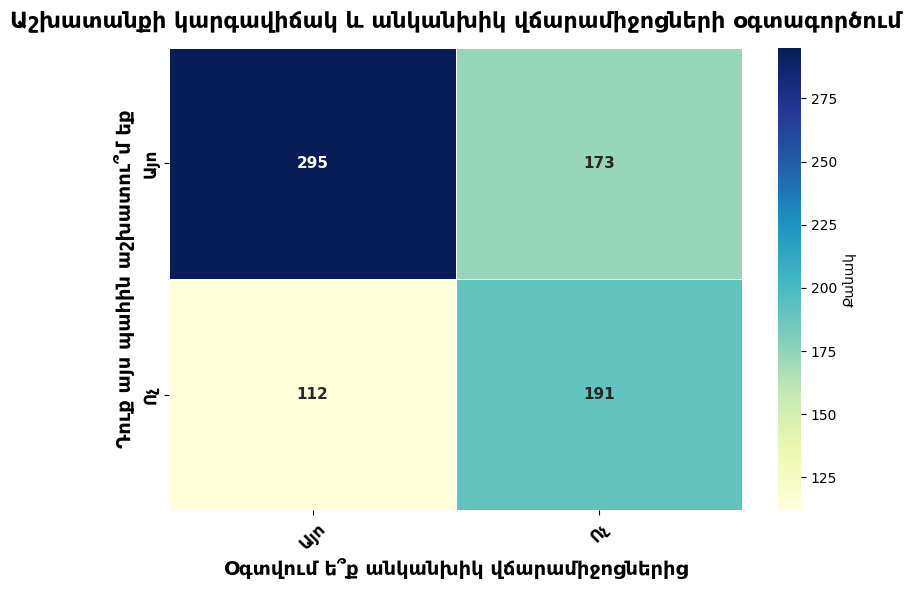

In [9]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    grouped,
    annot=True,
    fmt="d",
    cmap="YlGnBu",
    linewidths=0.5,
    linecolor='white',
    cbar_kws={'label': 'Քանակ'},
    annot_kws={'fontsize': 11, 'weight': 'bold'}
)

plt.title('Աշխատանքի կարգավիճակ և անկանխիկ վճարամիջոցների օգտագործում', fontsize=16, weight='bold', pad=15)
plt.ylabel('Դուք այս պահին աշխատու՞մ եք', fontsize=14, weight='bold')
plt.xlabel('Օգտվում ե՞ք անկանխիկ վճարամիջոցներից', fontsize=14, weight='bold')

plt.xticks(rotation=45, fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')

plt.tight_layout()

plt.show()

<Figure size 1100x700 with 0 Axes>

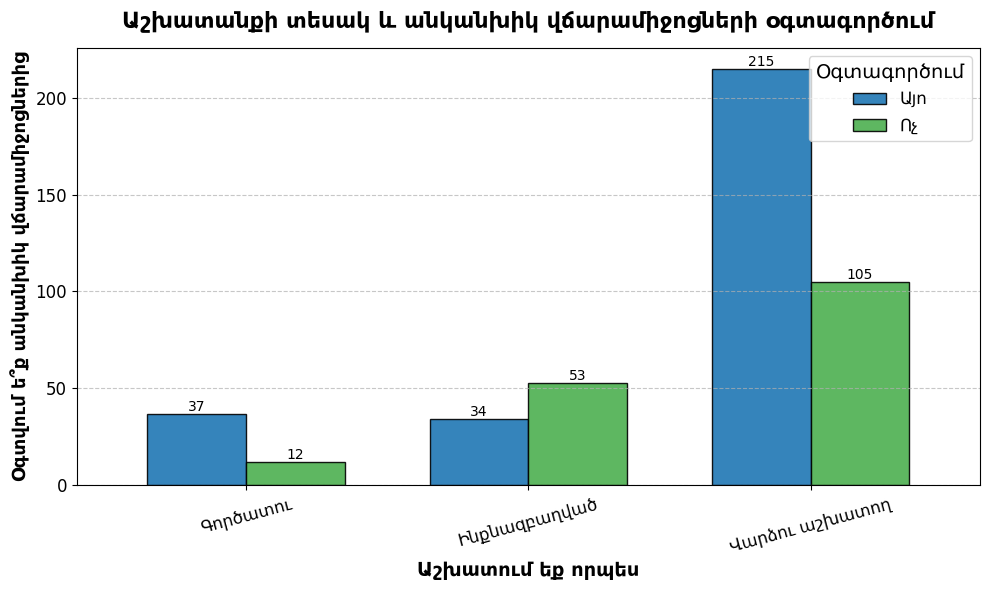

In [10]:
grouped = data.groupby(['Աշխատում եք որպես', 'Օգտվում ե՞ք անկանխիկ վճարամիջոցներից ']).size().unstack(fill_value=0)

plt.figure(figsize=(11, 7))
colors = ['tab:blue', '#4CAF50']

grouped.plot(
    kind='bar',
    figsize=(10, 6),
    width=0.7,
    color=colors,
    edgecolor='black',
    alpha=0.9
)

for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%d', label_type='edge', fontsize=10)

plt.title('Աշխատանքի տեսակ և անկանխիկ վճարամիջոցների օգտագործում', fontsize=16, weight='bold', pad=15)
plt.ylabel('Օգտվում ե՞ք անկանխիկ վճարամիջոցներից', fontsize=13, weight='bold')
plt.xlabel('Աշխատում եք որպես', fontsize=14, weight='bold')
plt.xticks(rotation=15, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Օգտագործում', fontsize=12, title_fontsize=14, loc='upper right')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

<Figure size 1600x800 with 0 Axes>

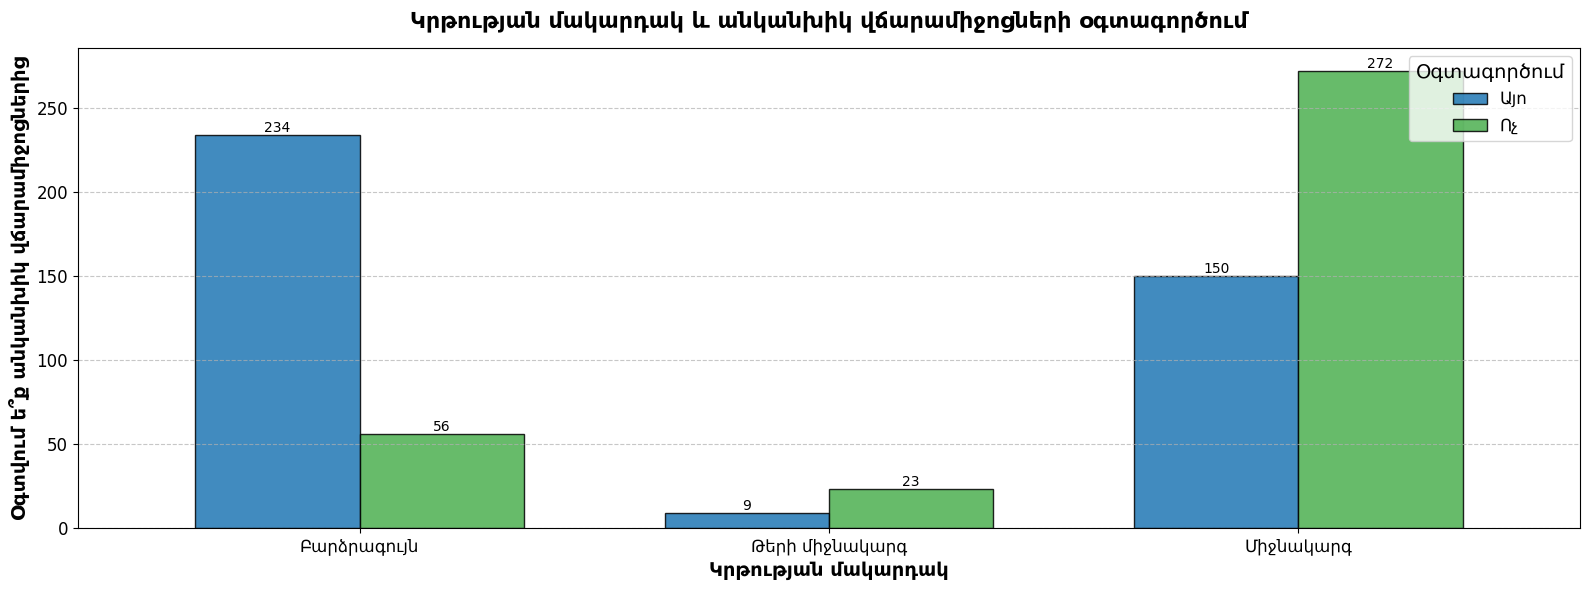

In [11]:
grouped = data.groupby(['Պատասխանողի կրթությունը', 'Օգտվում ե՞ք անկանխիկ վճարամիջոցներից ']).size().unstack(fill_value=0)
plt.figure(figsize=(16, 8))
colors = ['tab:blue', '#4CAF50']

grouped.plot(
    kind='bar',
    figsize=(16,6),
    width=0.7,
    color=colors,
    edgecolor='black',
    alpha=0.85
)

for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%d', label_type='edge', fontsize=10)

plt.title('Կրթության մակարդակ և անկանխիկ վճարամիջոցների օգտագործում', fontsize=16, weight='bold', pad=15)
plt.ylabel('Օգտվում ե՞ք անկանխիկ վճարամիջոցներից', fontsize=14, weight='bold')
plt.xlabel('Կրթության մակարդակ', fontsize=14, weight='bold')

plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

plt.legend(title='Օգտագործում', fontsize=12, title_fontsize=14, loc='upper right')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<Figure size 1300x800 with 0 Axes>

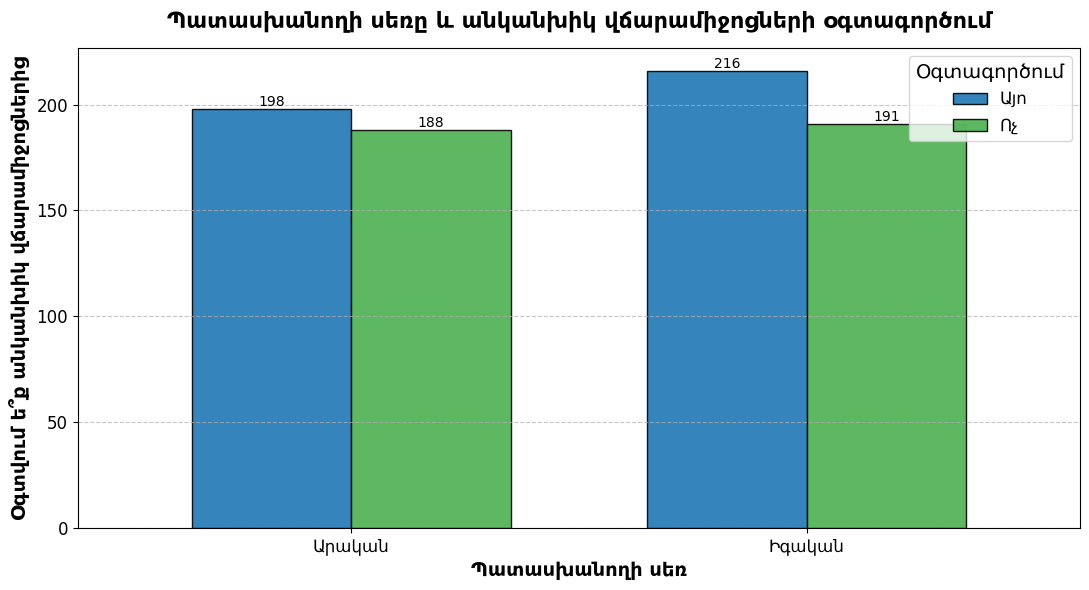

In [12]:
grouped = data.groupby(['Պատասխանողի սեռը', 'Օգտվում ե՞ք անկանխիկ վճարամիջոցներից ']).size().unstack(fill_value=0)

plt.figure(figsize=(13, 8))
colors = ['tab:blue', '#4CAF50']

grouped.plot(
    kind='bar',
    figsize=(11, 6),
    width=0.7,
    color=colors,
    edgecolor='black',
    alpha=0.9
)

for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%d', label_type='edge', fontsize=10)

plt.title('Պատասխանողի սեռը և անկանխիկ վճարամիջոցների օգտագործում', fontsize=16, weight='bold', pad=15)
plt.ylabel('Օգտվում ե՞ք անկանխիկ վճարամիջոցներից', fontsize=14, weight='bold')
plt.xlabel('Պատասխանողի սեռ', fontsize=14, weight='bold')
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Օգտագործում', fontsize=12, title_fontsize=14, loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<Figure size 600x400 with 0 Axes>

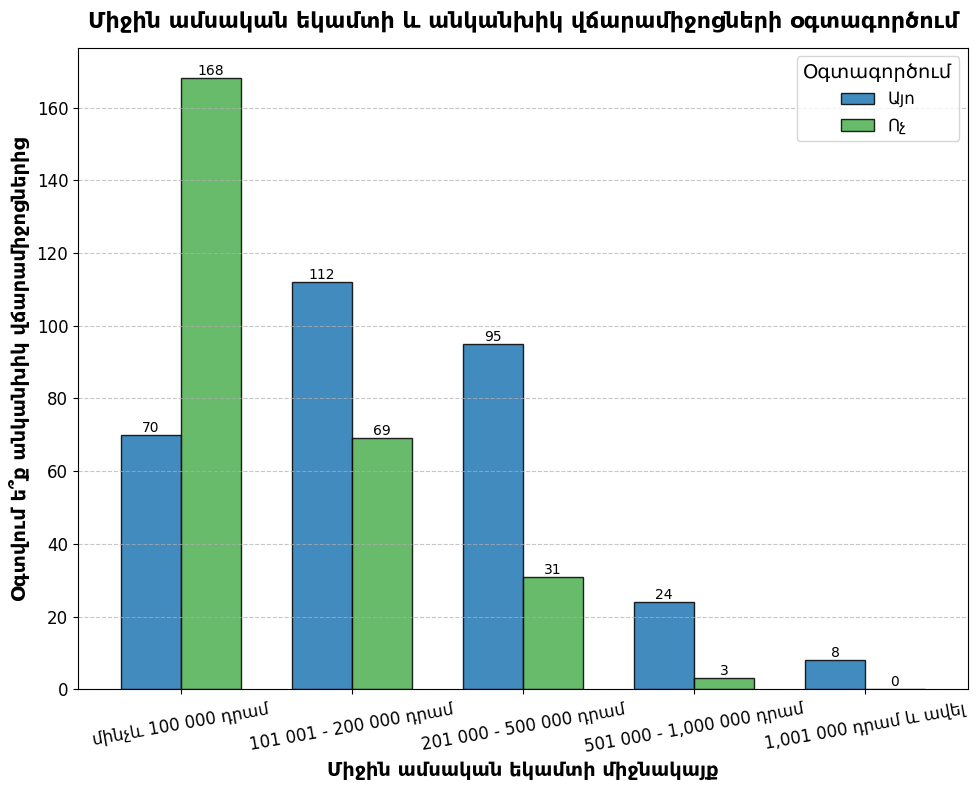

In [13]:
grouped = data.groupby(['Ձեր միջին ամսական եկամտի միջնակայքը', 'Օգտվում ե՞ք անկանխիկ վճարամիջոցներից ']).size().unstack(fill_value=0)
new_order = [grouped.index[-1]] + grouped.index[1:-1].tolist() + [grouped.index[0]]
grouped = grouped.loc[new_order]

plt.figure(figsize=(6, 4))
colors = ['tab:blue', '#4CAF50']

grouped.plot(
    kind='bar',
    figsize=(10, 8),
    width=0.7,
    color=colors,
    edgecolor='black',
    alpha=0.85
)

for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%d', label_type='edge', fontsize=10)

plt.title('Միջին ամսական եկամտի և անկանխիկ վճարամիջոցների օգտագործում', fontsize=16, weight='bold', pad=15)
plt.ylabel('Օգտվում ե՞ք անկանխիկ վճարամիջոցներից', fontsize=14, weight='bold')
plt.xlabel('Միջին ամսական եկամտի միջնակայք', fontsize=14, weight='bold')

plt.xticks(rotation=10, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Օգտագործում', fontsize=12, title_fontsize=14, loc='upper right')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

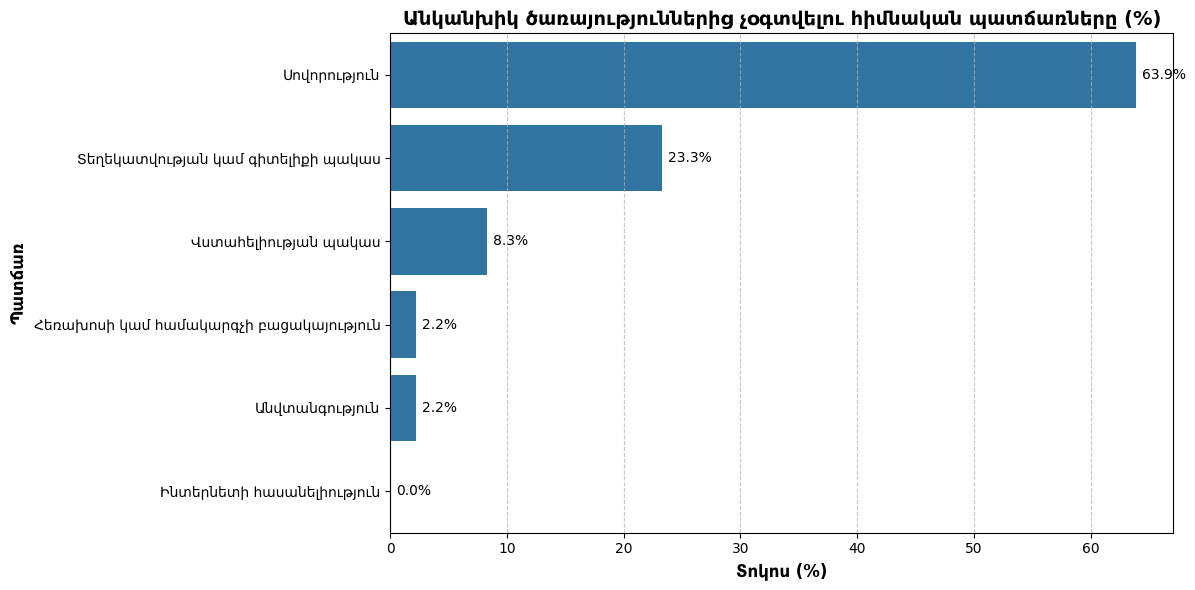

In [17]:
reasons_cols = [
    'Ի՞նչն է պատճառը, որ չեք օգտվում անկանխիկ վճարային ծառայություններից(Տեղեկատվության կամ գիտելիքի պակաս)',
    'Ի՞նչն է պատճառը, որ չեք օգտվում անկանխիկ վճարային ծառայություններից(Հեռախոսի կամ համակարգչի բացակայություն)',
    'Ի՞նչն է պատճառը, որ չեք օգտվում անկանխիկ վճարային ծառայություններից(Ինտերնետի հասանելիություն)',
    'Ի՞նչն է պատճառը, որ չեք օգտվում անկանխիկ վճարային ծառայություններից(Վստահելիության պակաս)',
    'Ի՞նչն է պատճառը, որ չեք օգտվում անկանխիկ վճարային ծառայություններից(Անվտանգություն)',
    'Ի՞նչն է պատճառը, որ չեք օգտվում անկանխիկ վճարային ծառայություններից(Սովորություն)'
]


reason_counts = df[reasons_cols].notnull().sum().reset_index()
reason_counts.columns = ['Պատճառ', 'Քանակ']

total_reasons_selected = reason_counts['Քանակ'].sum()
reason_counts['Տոկոս'] = (reason_counts['Քանակ'] / total_reasons_selected) * 100
reason_counts['Պատճառ'] = reason_counts['Պատճառ'].str.extract(r'\((.*?)\)')

reason_counts = reason_counts.sort_values(by='Տոկոս', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Տոկոս', y='Պատճառ', data=reason_counts, color='tab:blue')
plt.title('Անկանխիկ ծառայություններից չօգտվելու հիմնական պատճառները (%)', fontsize=14, weight='bold')
plt.xlabel('Տոկոս (%)', fontsize=12, weight='bold')
plt.ylabel('Պատճառ', fontsize=12, weight='bold')

for index, value in enumerate(reason_counts['Տոկոս']):
    plt.text(value + 0.5, index, f'{value:.1f}%', va='center', fontsize=10)

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

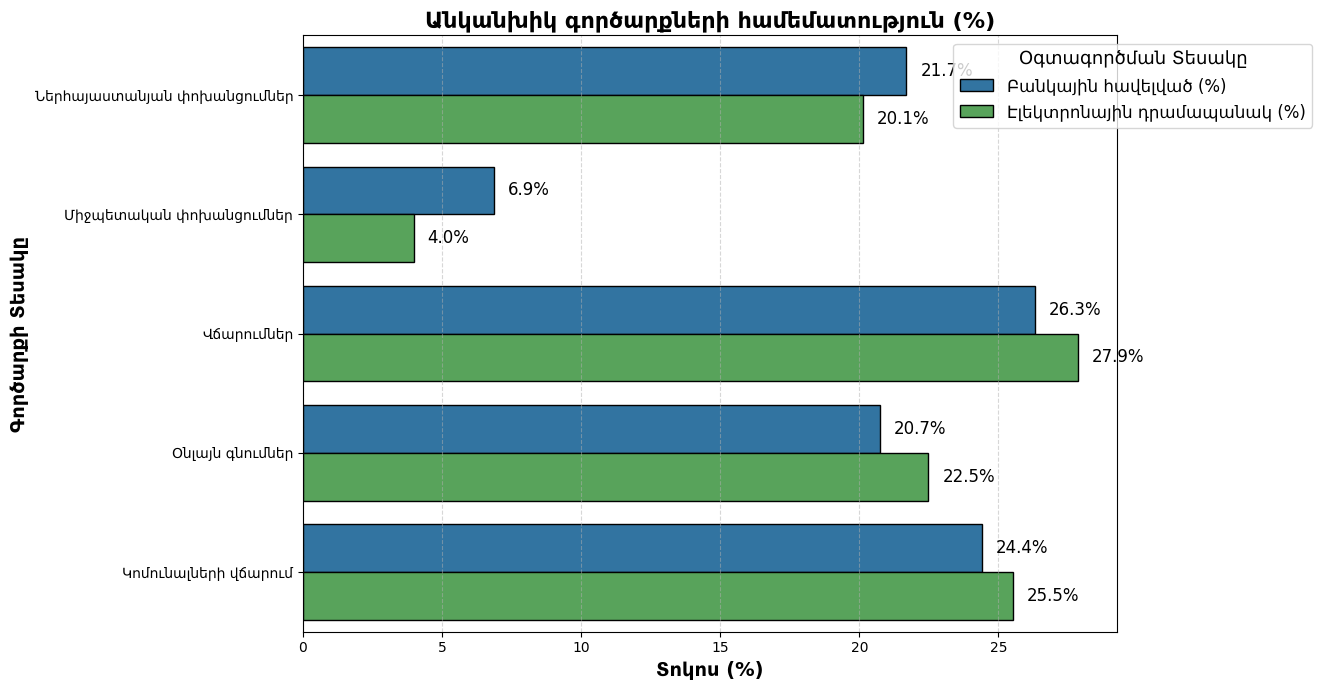

In [19]:
banking_cols = {
    'Ներհայաստանյան փոխանցումներ': 'Խնդրում եմ թվարկեք այն անկանխիկ գործարքները, որոնք իրականացնում եք առցանց՝ բանկինգի բջջային հավելվածով(Ներհայաստանյան փոխանցումներ)',
    'Միջպետական փոխանցումներ': 'Խնդրում եմ թվարկեք այն անկանխիկ գործարքները, որոնք իրականացնում եք առցանց՝ բանկինգի բջջային հավելվածով(Միջպետական փոխանցումներ)',
    'Վճարումներ': 'Խնդրում եմ թվարկեք այն անկանխիկ գործարքները, որոնք իրականացնում եք առցանց՝ բանկինգի բջջային հավելվածով(Վաճարումներ)',
    'Օնլայն գնումներ': 'Խնդրում եմ թվարկեք այն անկանխիկ գործարքները, որոնք իրականացնում եք առցանց՝ բանկինգի բջջային հավելվածով(Օնլայն գնումներ)',
    'Կոմունալների վճարում': 'Խնդրում եմ թվարկեք այն անկանխիկ գործարքները, որոնք իրականացնում եք առցանց՝ բանկինգի բջջային հավելվածով(Կոմունալների վճարում)'
}

wallet_cols = {
    'Ներհայաստանյան փոխանցումներ': 'Խնդրում եմ թվարկեք այն անկանխիկ գործարքները, որոնք իրականացնում եք առցանց՝ էլեկտրոնային դրամապանակ բջջային հավելվածներով(Ներհայաստանյան փոխանցումներ)',
    'Միջպետական փոխանցումներ': 'Խնդրում եմ թվարկեք այն անկանխիկ գործարքները, որոնք իրականացնում եք առցանց՝ էլեկտրոնային դրամապանակ բջջային հավելվածներով(Միջպետական փոխանցումներ)',
    'Վճարումներ': 'Խնդրում եմ թվարկեք այն անկանխիկ գործարքները, որոնք իրականացնում եք առցանց՝ էլեկտրոնային դրամապանակ բջջային հավելվածներով(Վճարումներ)',
    'Օնլայն գնումներ': 'Խնդրում եմ թվարկեք այն անկանխիկ գործարքները, որոնք իրականացնում եք առցանց՝ էլեկտրոնային դրամապանակ բջջային հավելվածներով(Օնլայն գնումներ)',
    'Կոմունալների վճարում': 'Խնդրում եմ թվարկեք այն անկանխիկ գործարքները, որոնք իրականացնում եք առցանց՝ էլեկտրոնային դրամապանակ բջջային հավելվածներով(Կոմունալների վճարում)'
}

total_banking_transactions = df[list(banking_cols.values())].notnull().sum().sum()
total_wallet_transactions = df[list(wallet_cols.values())].notnull().sum().sum()

banking_percent = {key: (df[col].notnull().sum() / total_banking_transactions) * 100 for key, col in banking_cols.items()}
wallet_percent = {key: (df[col].notnull().sum() / total_wallet_transactions) * 100 for key, col in wallet_cols.items()}

data = pd.DataFrame({
    'Գործարքի Տեսակը': list(banking_cols.keys()),
    'Բանկային հավելված (%)': list(banking_percent.values()),
    'Էլեկտրոնային դրամապանակ (%)': list(wallet_percent.values())
})

data = data[(data['Բանկային հավելված (%)'] > 0) | (data['Էլեկտրոնային դրամապանակ (%)'] > 0)]

melted_data = data.melt(id_vars='Գործարքի Տեսակը', var_name='Օգտագործման Տեսակը', value_name='Տոկոս')

plt.figure(figsize=(14, 7))
barplot = sns.barplot(
    x='Տոկոս',
    y='Գործարքի Տեսակը',
    hue='Օգտագործման Տեսակը',
    data=melted_data,
    palette=['tab:blue', '#4CAF50'],
    edgecolor='black'
)

plt.title('Անկանխիկ գործարքների համեմատություն (%)', fontsize=16, weight='bold')
plt.xlabel('Տոկոս (%)', fontsize=14, weight='bold')
plt.ylabel('Գործարքի Տեսակը', fontsize=14, weight='bold')

for p in barplot.patches:
    width = p.get_width()
    if width > 0:
        plt.text(width + 0.5, p.get_y() + p.get_height() / 2, f'{width:.1f}%', ha='left', va='center', fontsize=12)

plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.legend(title='Օգտագործման Տեսակը', fontsize=12, title_fontsize=13, loc='upper right', bbox_to_anchor=(1.25, 1))
plt.tight_layout()
plt.show()

<ipython-input-28-3a9ec0f88137>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


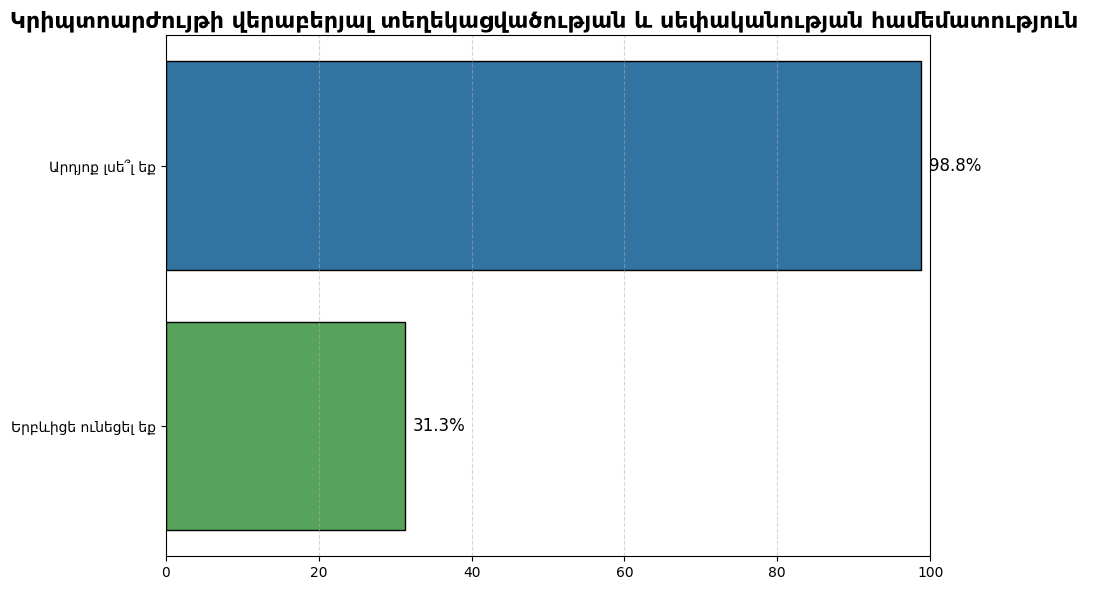

In [28]:
awareness_col = 'Արդյոք լսե՞լ եք մասնավոր կրիպտոաժույթների մասին'
ownership_col = 'Երբևիցէ կրիպտոաժույթ ունեցե՞լ եք'

awareness_yes = df[awareness_col].notnull().sum()
ownership_yes = df[ownership_col].notnull().sum()

total_respondents = df[[awareness_col, ownership_col]].notnull().any(axis=1).sum()

awareness_percent = (awareness_yes / total_respondents) * 100
ownership_percent = (ownership_yes / total_respondents) * 100

data = pd.DataFrame({
    'Category': ['Արդյոք լսե՞լ եք', 'Երբևիցե ունեցել եք'],
    'Տոկոս': [awareness_percent, ownership_percent]
})

plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    x='Տոկոս',
    y='Category',
    data=data,
    palette=['tab:blue', '#4CAF50'],
    edgecolor='black'
)

plt.title('Կրիպտոարժույթի վերաբերյալ տեղեկացվածության և սեփականության համեմատություն ', fontsize=16, weight='bold')
plt.xlabel('', fontsize=14, weight='bold')
plt.ylabel('', fontsize=14, weight='bold')

for p in barplot.patches:
    width = p.get_width()
    if width > 0:
        plt.text(width + 1, p.get_y() + p.get_height() / 2, f'{width:.1f}%', ha='left', va='center', fontsize=12)

plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.xlim(0, 100)
plt.tight_layout()
plt.show()

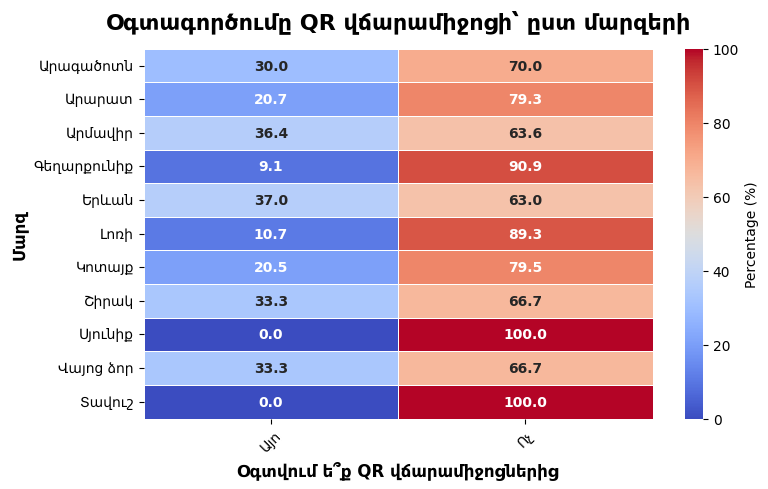

In [15]:
grouped = data.groupby(['Մարզ', 'Օգտվու՞մ եք արդյոք QR համակարգերից՝ վճարումներ կատարելիս']).size().unstack(fill_value=0)
grouped_percentage = grouped.div(grouped.sum(axis=1), axis=0) * 100

plt.figure(figsize=(8, 5))
sns.heatmap(
    grouped_percentage,
    annot=True,
    fmt=".1f",
    cmap="coolwarm",
    linewidths=0.5,
    linecolor='white',
    cbar_kws={'label': 'Percentage (%)'},
    annot_kws={'fontsize': 10, 'weight': 'bold'}
)

plt.title('Օգտագործումը QR վճարամիջոցի՝ ըստ մարզերի', fontsize=16, weight='bold', pad=15)
plt.ylabel('Մարզ', fontsize=12, weight='bold')
plt.xlabel('Օգտվում ե՞ք QR վճարամիջոցներից', fontsize=12, weight='bold')

plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()